# Import packages

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from submodules.plots import plotGender
from submodules.plots import plotUnit

# data splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# model
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# performance
from sklearn.metrics import f1_score

# Overview

1. Fetch the data for updates using Python
1. Load the data using Pandas
1. Explore the data with Pandas
1. Split the data with Scikit-Learn
1. Visualize the data with Matplotlib and Seaborn
1. Correlation among features
1. Feature down selection

# Download the data
In a working environment, data is available in a relational database or data store spread
across multiple tables, documents and files. Getting authorized access to the data is a part of this step.

For this example, the data has been downloaded and extracted locally from Kaggle.
Kaggle data source: https://www.kaggle.com/maxskoryk/datasepsis

Fetch the data

In [2]:
# TODO

# Load the data

Load semi-colon seperated data from disk

In [3]:
data = pd.read_csv("data/dataSepsis.csv", sep=";")

# Explore the data

In [4]:
# first 10 rows
data.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,NaN,NaN,NaN,NaN,30.0,NaN,21.0,45.0,...,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,17,0
1,58.0,95.0,36.11,143.0,77.0,47.0,11.0,NaN,NaN,22.0,...,11.0,NaN,158.0,75.91,0,0.0,1.0,-98.60,10,0
2,91.0,94.0,38.50,133.0,74.0,48.0,34.0,NaN,NaN,31.0,...,8.3,NaN,465.0,45.82,0,1.0,0.0,-1195.71,11,0
3,92.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,...,12.0,NaN,298.0,52.01,1,1.0,0.0,-0.03,13,0
4,155.5,94.5,NaN,147.5,102.0,NaN,33.0,NaN,-12.0,13.0,...,9.3,NaN,26.0,64.24,1,1.0,0.0,-0.05,2,0
5,73.0,99.0,36.06,100.0,67.0,49.5,16.5,NaN,-8.0,16.0,...,11.4,NaN,357.0,87.08,1,NaN,NaN,-2.23,2,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,25.0,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,257,1
7,82.0,100.0,35.50,112.0,79.5,63.0,14.0,NaN,0.0,23.0,...,8.7,NaN,115.0,76.71,0,0.0,1.0,-2.36,3,0
8,89.0,100.0,NaN,141.0,85.0,57.0,17.0,NaN,1.0,25.0,...,10.6,NaN,184.0,65.79,1,NaN,NaN,-0.02,35,1
9,100.0,95.0,37.28,121.0,20.0,NaN,NaN,NaN,NaN,22.0,...,7.3,NaN,127.0,81.64,1,1.0,0.0,-0.03,16,0


## Quick summary

- There are ~36k records in the dataset
- All the attributes are numeric
- We do have null values (e.g. HR Non-Null count)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                35506 non-null  float64
 1   O2Sat             34736 non-null  float64
 2   Temp              17101 non-null  float64
 3   SBP               34617 non-null  float64
 4   MAP               34846 non-null  float64
 5   DBP               27917 non-null  float64
 6   Resp              33890 non-null  float64
 7   EtCO2             1613 non-null   float64
 8   BaseExcess        7184 non-null   float64
 9   HCO3              16984 non-null  float64
 10  FiO2              6427 non-null   float64
 11  pH                9221 non-null   float64
 12  PaCO2             8430 non-null   float64
 13  SaO2              4335 non-null   float64
 14  AST               10391 non-null  float64
 15  BUN               32526 non-null  float64
 16  Alkalinephos      10269 non-null  float6

## In-depth summary
- Total rows ~ 36k
- Null values are ignored
- average (mean), minimum (min), maximum (max) are self-explanatory
- standard deviation (std) how dispersed the values are
    - normal (Gaussian) distribution follows 68-95-99.7 rule
        - 68% of values are within 1 std
        - 95% of values are within 2 std
        - 99.7% of values are within 3 std
- 1st (25%), median (50%), 3rd (75%) quartiles or percentiles, for example:
    - 25% of the patients had a temp lower than 36.3°C
    - 75% of the patients had a resp higher than 20.5 breaths per minute


In [6]:
data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
count,35506.000000,34736.000000,17101.000000,34617.000000,34846.000000,27917.000000,33890.000000,1613.000000,7184.000000,16984.000000,...,31460.000000,2141.000000,31469.000000,36302.000000,36302.000000,22221.000000,22221.000000,36302.000000,36302.000000,36302.000000
mean,83.547246,97.444337,36.824187,122.625064,82.263649,63.793506,18.041841,32.402046,-0.306508,24.255841,...,11.094782,294.154367,208.785297,61.676240,0.559363,0.495072,0.504928,-51.437230,16.982315,0.072916
std,17.486670,2.827282,0.855630,23.092558,16.876642,14.130816,5.020912,7.947214,4.151943,4.150083,...,6.939193,154.603297,101.953073,16.454453,0.496470,0.499987,0.499987,136.981879,22.731072,0.260002
min,26.000000,27.000000,26.670000,32.000000,20.000000,22.000000,1.000000,10.000000,-29.000000,5.000000,...,0.100000,34.000000,2.000000,14.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000
25%,71.000000,96.000000,36.300000,106.000000,71.000000,54.000000,15.000000,28.000000,-2.000000,22.000000,...,7.400000,188.000000,143.000000,51.000000,0.000000,0.000000,0.000000,-43.510000,6.000000,0.000000
50%,82.000000,98.000000,36.800000,120.000000,80.000000,62.000000,18.000000,33.000000,0.000000,24.000000,...,10.050000,252.000000,193.000000,63.150000,1.000000,0.000000,1.000000,-6.060000,11.000000,0.000000
75%,94.000000,100.000000,37.390000,137.000000,91.330000,72.000000,20.500000,37.500000,2.000000,26.000000,...,13.400000,364.000000,255.000000,74.000000,1.000000,1.000000,1.000000,-0.040000,20.000000,0.000000
max,184.000000,100.000000,41.800000,281.000000,291.000000,281.000000,59.000000,97.000000,36.000000,55.000000,...,387.000000,1051.000000,2322.000000,100.000000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000


## In-depth summary transposed
Some features with few entries, missing values and nulls we may want drop
- FiO2
- EtCO2
- SaO2
- Bilirubin_direct
- Troponinl

In [7]:
# Transpose the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HR,35506.0,83.547246,17.486670,26.00,71.00,82.000,94.0000,184.00
O2Sat,34736.0,97.444337,2.827282,27.00,96.00,98.000,100.0000,100.00
Temp,17101.0,36.824187,0.855630,26.67,36.30,36.800,37.3900,41.80
SBP,34617.0,122.625064,23.092558,32.00,106.00,120.000,137.0000,281.00
MAP,34846.0,82.263649,16.876642,20.00,71.00,80.000,91.3300,291.00
DBP,27917.0,63.793506,14.130816,22.00,54.00,62.000,72.0000,281.00
Resp,33890.0,18.041841,5.020912,1.00,15.00,18.000,20.5000,59.00
EtCO2,1613.0,32.402046,7.947214,10.00,28.00,33.000,37.5000,97.00
BaseExcess,7184.0,-0.306508,4.151943,-29.00,-2.00,0.000,2.0000,36.00
HCO3,16984.0,24.255841,4.150083,5.00,22.00,24.000,26.0000,55.00


## Septic vs. Non-septic percentage

In [10]:
data["isSepsis"].value_counts(normalize=True).to_frame()

,isSepsis
0,0.927084
1,0.072916


# Create a Test Dataset
> uses scikit-learn

Performing this early minimizes generalization and bias you may inadvertently apply to your system.
Simply put, a test set of data involves: picking ~20% of the instances randomly and setting them aside.

Some considerations for sampling methods that generate the test set:
1. you don't want your model to see the entire dataset
1. you want to be able to fetch new data for training
1. you want to maintain the same percentage of training data against the entire dataset
1. you want a representative training dataset (~7% septic positive)

In [14]:
# sets 20% of the data aside for testing, sets the random number generate to it always generates the same shuffled indicies
X_train, X_test, y_train, y_test = train_test_split(data.drop("isSepsis", axis=1), data["isSepsis"], test_size=0.2, random_state=42)

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Resp"])

# Visualize the data
> uses matplotlib

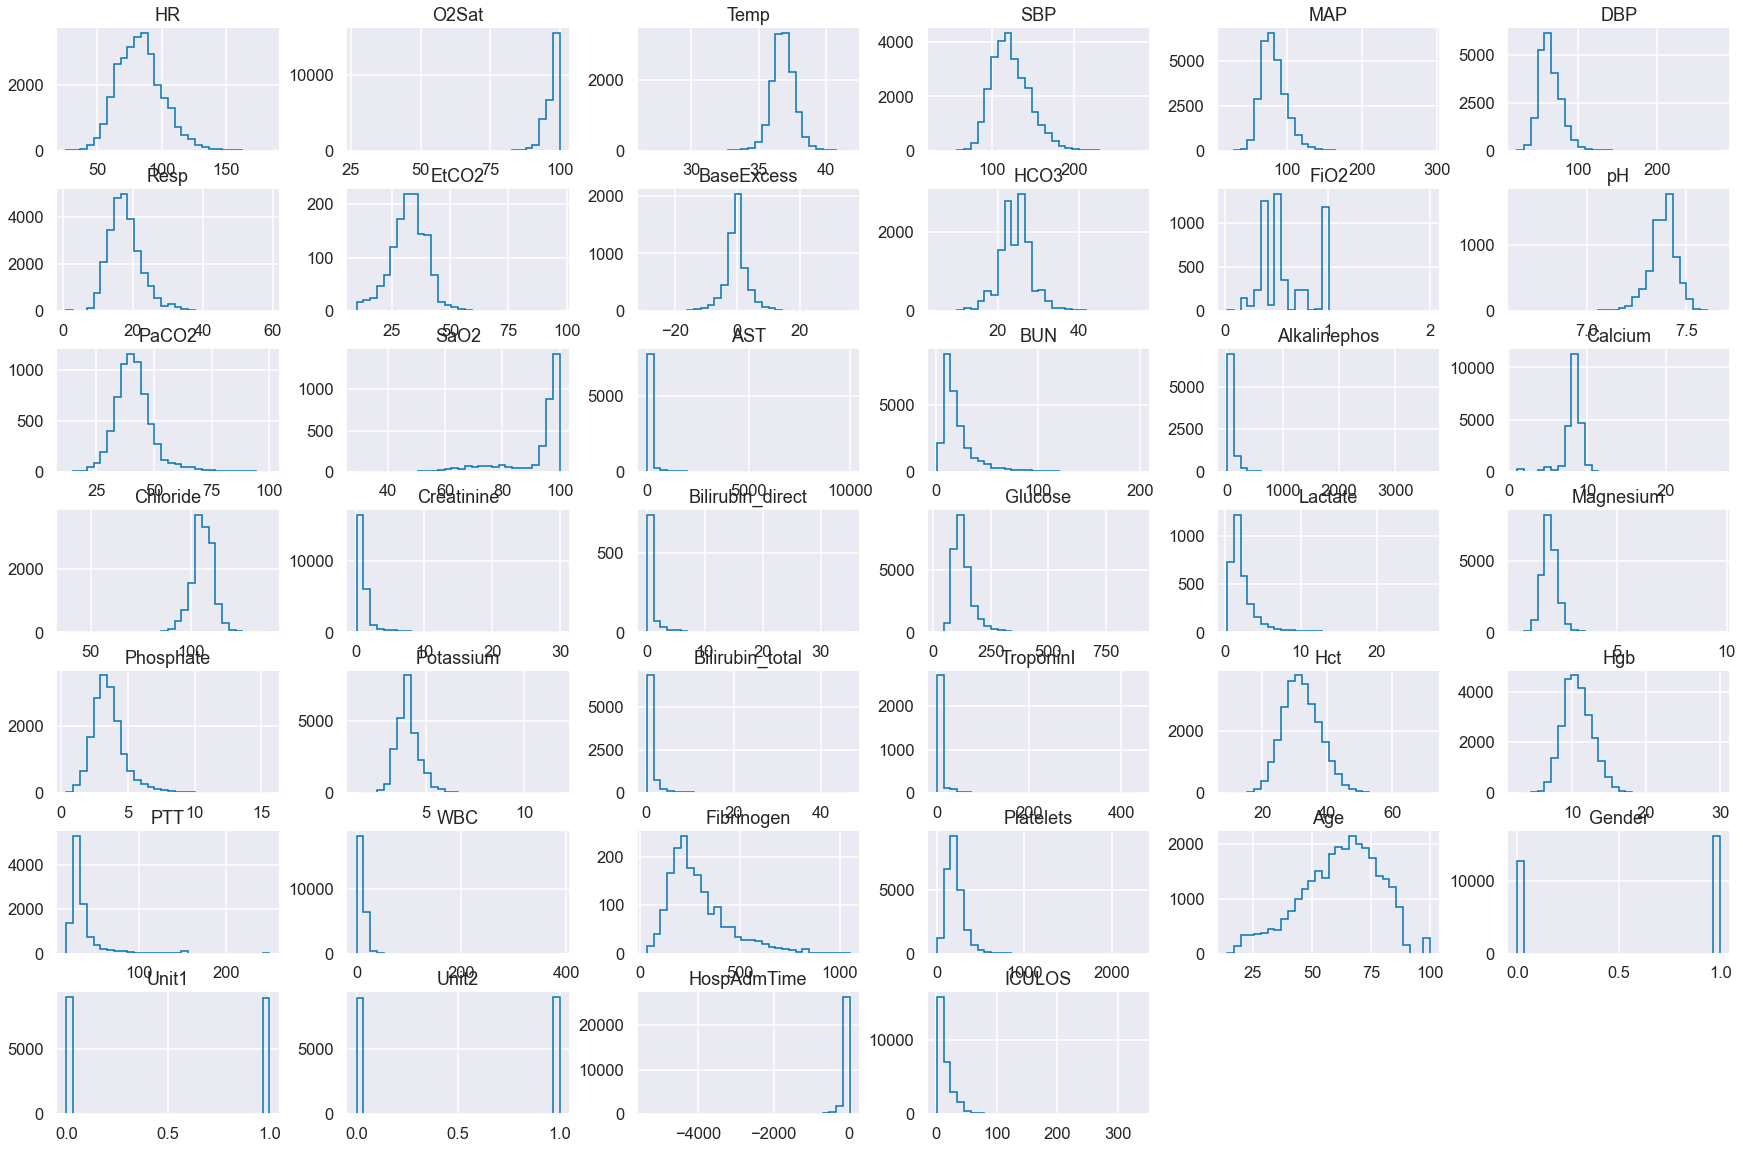

In [33]:
# % denotes a jupyter magic command, telling matplotlib to use Jupyters backend
%matplotlib inline
import matplotlib.pyplot as plt
X_train.hist(bins=30, figsize=(30,20), histtype='step')
plt.show()

Separate the data categories: vitals, labs, and demographics

In [39]:
vitals = ["HR", # Heart Rate normal adult 60 - 100 beats per minute (bpm)
               "O2Sat", # Oxygen saturation normal adult 97% - 100% (%)
               "Temp", # Temperature normal 97.8°F/36.5°C - 99°F/37.2°C (°C)
               "SBP", # Systolic Blood Pressure normal < 120 mmHg (mm Hg)
               "MAP", # Mean Arterial Pressure (mm Hg)
               "DBP", # beclomethasone dipropionate normal < 80 mmHg (mm Hg)
               "Resp", # Respiration rate  12<normal<20 breaths / minute (bpm)
               "EtCO2"] # End-tidal CO2 maximum concentration of CO2 at exhalation normal 35 - 45 mmHg (mm Hg)

labs = ['BaseExcess', # strong acid to restore pH (mmoI/L)
              'Magnesium', # symptoms such as weakness, irritability, cardiac arrhythmia, nausea, and/or diarrhea (mmoI/L)
              'Glucose', # blood sugar test (indicates diagnose diabetes, pre-diabetes and gestational diabetes) (mg/dL)
              'Alkalinephos', # Alkaline phosphatase (indicates enzyme activity) (IU/L)
              'pH', # 0:14 = acidic = lower pH; alkaline = higher
              'Chloride', # an electrolyte to balance fluid in cells normal 96-103 ml (indicates blood pressure/pH) (mmoI/L)
              'Lactate', # high levels indicate lack of oxygen (hypoxia) or other conditions (indicates sepsis) (mg/dL)
              # Respiratory
              'HCO3', # Bicarbonate, carbon dioxide in blood (indicates metabolism / resp) (mmoI/L)
              'FiO2', # % of concentration of oxygen inhaled (indicates resp) (%)
              'PaCO2', # partial pressure of carbon dioxide measured in blood (indicates resp) (mm Hg)
              'SaO2', # normal 95-100% oxygen saturation bound to hemoglobin (indicates resp) (%)
              # liver
              'AST', # aspartate aminotransferase (indicates liver) (IU/L)
              'Bilirubin_direct', # conjugated water soluble (indicates liver) (mg/dL)
              'Bilirubin_total', # normal 0.1:1.2 mg/dL (indicates liver) (mg/dL)
              # kidneys
              'BUN', # blood urea nitrogen, nitrogen in the blood (indicates kidneys) (mg/dL)
              'Creatinine', # metabolic panel (indicates kidneys) (mg/dL)
              'Calcium', # indicates range of conditions bones, heart, nerves, kidneys, and teeth (mg/dL)
              'Phosphate', # related to calcium (indicates kidney or diabetes)  (mg/dL)
              'Potassium', # electrolyte or metabolism (affected by blood pressure, kidneys, etc.)  (mmoI/L)
              # Heart
              'TroponinI', # cardiac specific Trenonin I and T (indicates injury to heart muscle)
              # Blood
              'Hct', # Hematocrit (indicates portion of blood from Red Blood Cell count) (%)
              'Hgb', # Hemoglobin apart of Complete Blood Count (CBC) (indicates blood cell count) (g/dL)
              'WBC', # White Blood Cell Count (indicates infection, inflammation or disease) (count10^3/µL)
              'PTT', # Partial Thromboplastin Time (indicates bleeding or blood clot) (seconds)
              'Fibrinogen', # coagulation factor I (indicates bleeding or blood clot or cardiovascular disease) (mg/dL)
              'Platelets'] # indicates bleeding disorder, a bone marrow disease, or other underlying condition ((count10^3/µL))

demo = ["Age", # Years (100 for patients 90 or above)
                "Gender", # Female = 0, Male = 1
                "HospAdmTime", # Hours between hospital admit and ICU admit
                "ICULOS"] # ICU length of stay in hours (hours since ICU admit)

Set the theme of your charts for consistency and audience

In [53]:
# set the plot style
sns.set_theme(context="talk", style="ticks", palette="colorblind")
#sns.set_theme(context="poster", style="dark", palette="Set2")
#sns.set_theme(context="notebook", style="whitegrid", palette="tab10")

## Visualize the Training Data
> uses seaborn

### Vital signs visualization
- Notice the clean splits in HR, Temp, and Resp between Septic vs Non-Septic patients

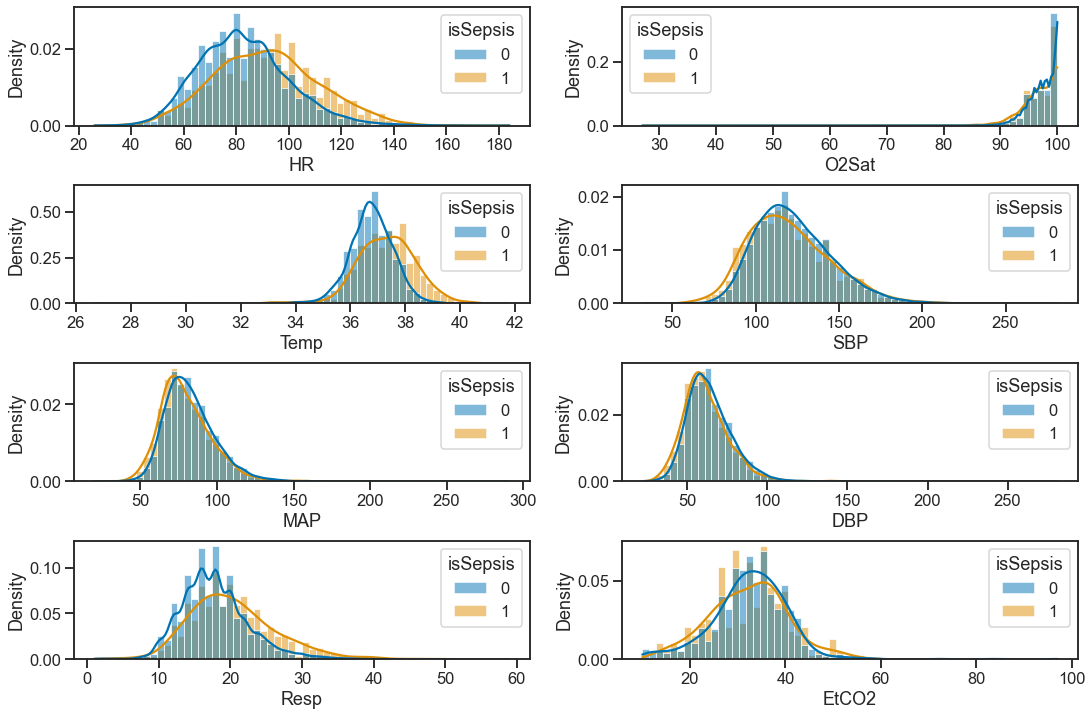

In [54]:
plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace = .5)
for i, column in enumerate(vitals, 1):
    plt.subplot(4,2,i)
    # stat = Aggregate statistic to compute in each bin density normalizes counts so that the area of the histogram is 1
    # common_norm = False = normalize each histogram independently
    # kde = If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)

### Laboratory data visualization
- Notice elevations in BaseExcess, pH, BUN, Bilirubin_direct and _total, PTT
- Notice low levels in Calcium, Hct, Hgb, Platelets
- Notice outliers in

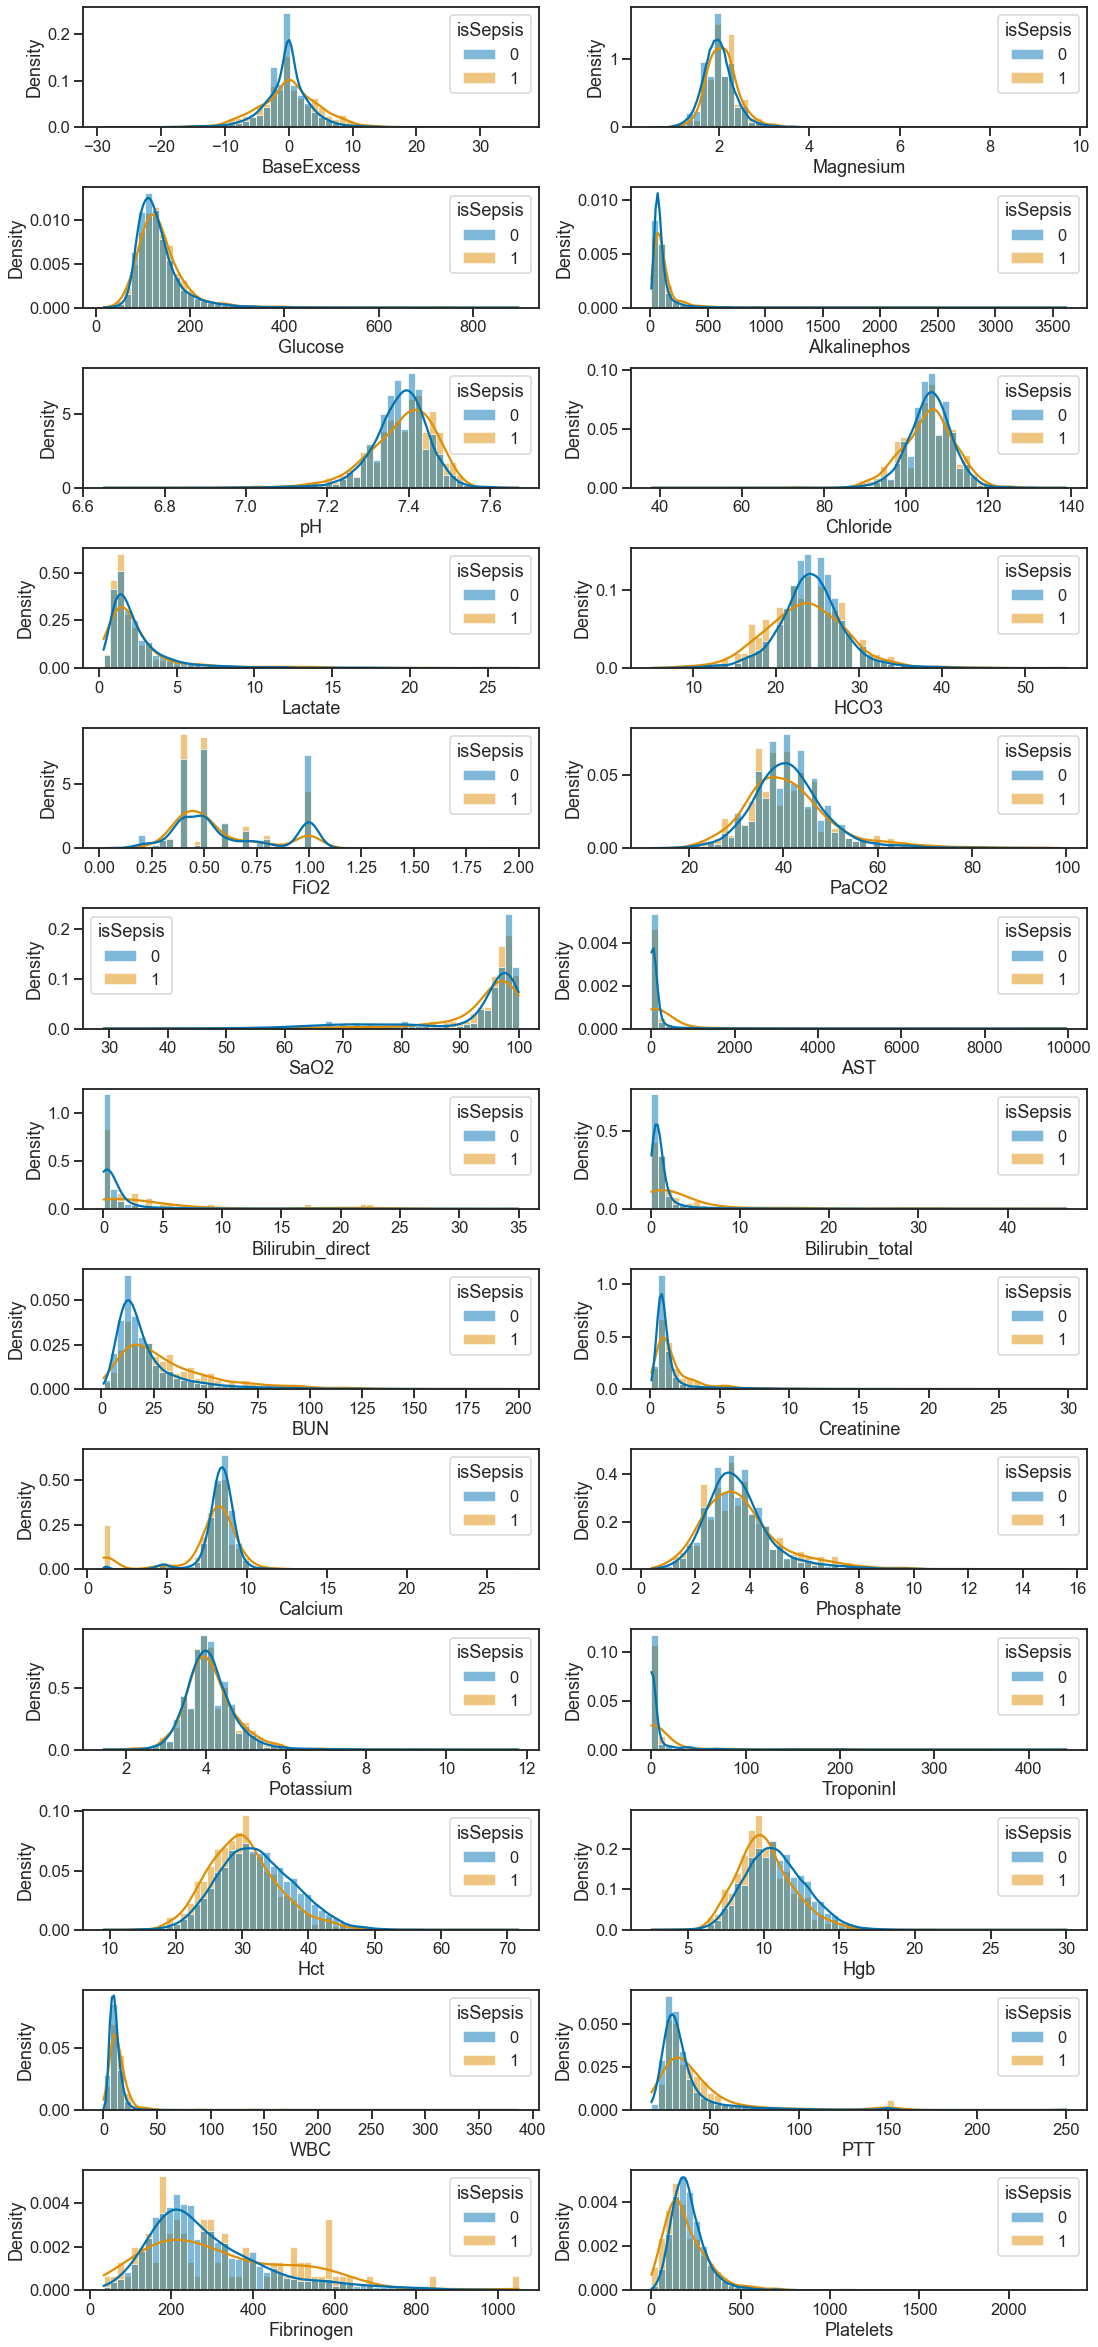

In [55]:
plt.figure(figsize=(18,42))
plt.subplots_adjust(hspace = .5)
for i, column in enumerate(labs, 1):
    plt.subplot(13,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)

### Demographic data visualization
- Notice the clean splits between Septic vs Non-Septic patients
- all patients have record of time in the ICU

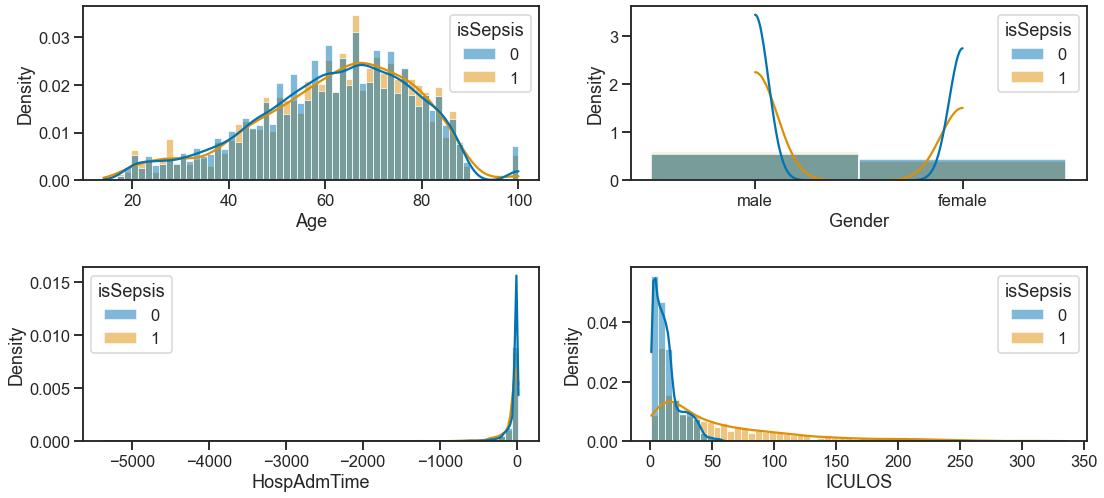

In [56]:
plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .5)
for i, column in enumerate(demo, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)

In [57]:
def plotGender(data):
    gender = data
    gender[gender==0] = "female"
    gender[gender==1] = "male"
    sns.set_theme(context="talk", style="ticks", palette="colorblind")
    sns.countplot(orient='h', y=gender, hue=y_train, dodge=False, palette="colorblind")


def plotUnit(data):
    Unit1 = data["Unit1"][data["Unit1"]==1].count() # patients in Unit1
    Unit2 = data["Unit2"][data["Unit2"]==1].count() # patients in Unit2
    totalNa = len(data["Unit1"][(data["Unit1"].isna()) & (data["Unit2"].isna())])
    sns.set_theme(context="talk", style="ticks", palette="colorblind")
    sns.barplot(palette="colorblind", x=["Medical ICU","Surgical ICU","Not Given"] ,y=[Unit1, Unit2, totalNa])

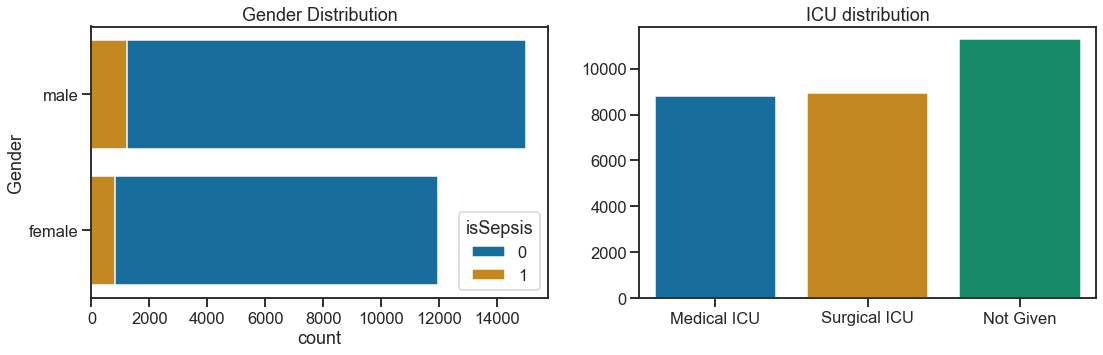

In [58]:

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Gender Distribution")
plotGender(X_train["Gender"])
plt.subplot(1,2,2)
plt.title("ICU distribution")
plotUnit(X_train)

#plt.savefig("additional.png", dpi=400)

## Correlation
Attribute combinations that help identify Septic risks.
- Notice the correlation between
    - MAP which is calculated from DBP and SBP (known indicator)
    - pH, HCO3, PaCO2
    - Hgb, Hct

<AxesSubplot:>

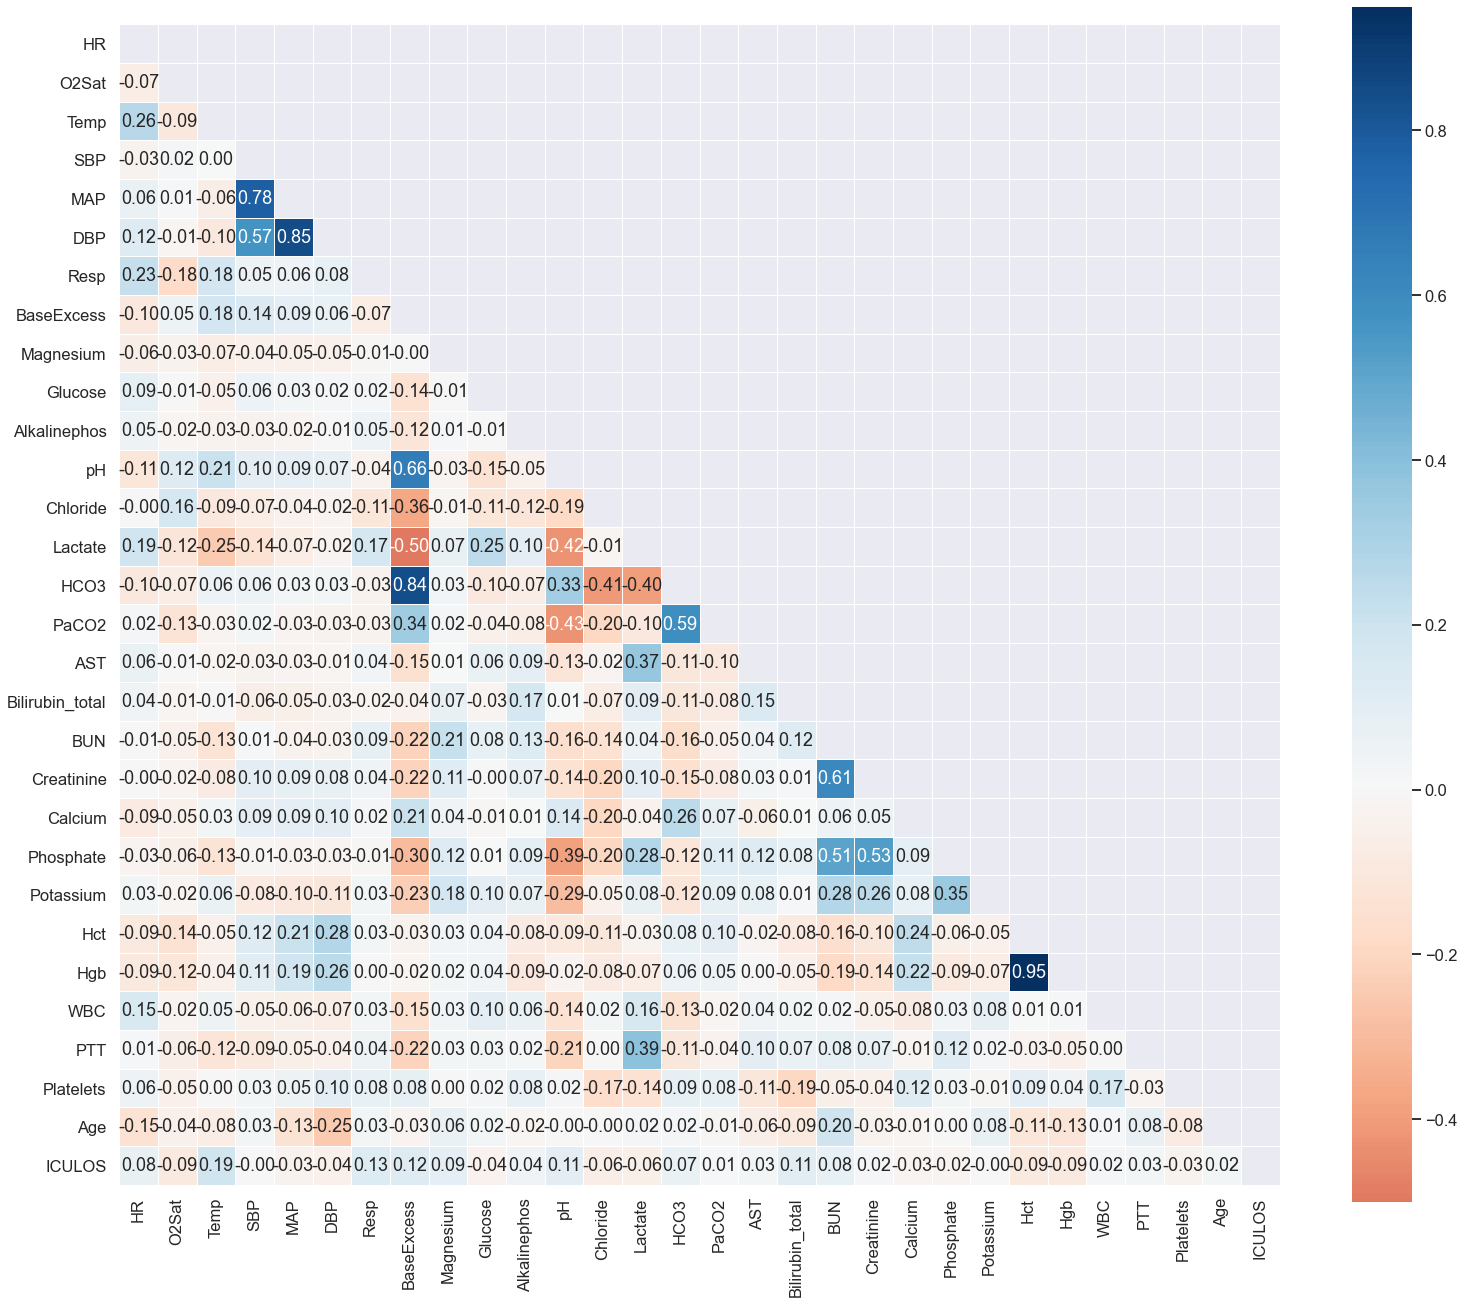

In [59]:
corr_features = [
               # vitals
               "HR", # Heart Rate normal adult 60 - 100 beats per minute (bpm)
               "O2Sat", # Oxygen saturation normal adult 97% - 100% (%)
               "Temp", # Temperature normal 97.8°F/36.5°C - 99°F/37.2°C (°C)
               "SBP", # Systolic Blood Pressure normal < 120 mmHg (mm Hg)
               "MAP", # Mean Arterial Pressure (mm Hg)
               "DBP", # beclomethasone dipropionate normal < 80 mmHg (mm Hg)
               "Resp", # Respiration rate  12<normal<20 breaths / minute (bpm)
               #"EtCO2", # End-tidal CO2 maximum concentration of CO2 at exhalation normal 35 - 45 mmHg (mm Hg) = REMOVED missing too much data
                # labs
              'BaseExcess', # strong acid to restore pH (mmoI/L)
              'Magnesium', # symptoms such as weakness, irritability, cardiac arrhythmia, nausea, and/or diarrhea (mmoI/L)
              'Glucose', # blood sugar test (indicates diagnose diabetes, pre-diabetes and gestational diabetes) (mg/dL)
              'Alkalinephos', # Alkaline phosphatase (indicates enzyme activity) (IU/L)
              'pH', # 0:14 = acidic = lower pH; alkaline = higher
              'Chloride', # an electrolyte to balance fluid in cells normal 96-103 ml (indicates blood pressure/pH) (mmoI/L)
              'Lactate', # high levels indicate lack of oxygen (hypoxia) or other conditions (indicates sepsis) (mg/dL)
              # Respiratory
              'HCO3', # Bicarbonate, carbon dioxide in blood (indicates metabolism / resp) (mmoI/L)
              #'FiO2', # % of concentration of oxygen inhaled (indicates resp) (%) - REMOVED missing too much data
              'PaCO2', # partial pressure of carbon dioxide measured in blood (indicates resp) (mm Hg)
              #'SaO2', # normal 95-100% oxygen saturation bound to hemoglobin (indicates resp) (%) = REMOVED no correlation
              # liver
              'AST', # aspartate aminotransferase (indicates liver) (IU/L)
              # Bilirubin_direct', # conjugated water soluble (indicates liver) (mg/dL) = REMOVED missing too much data
              'Bilirubin_total', # normal 0.1:1.2 mg/dL (indicates liver) (mg/dL)
              # kidneys
              'BUN', # blood urea nitrogen, nitrogen in the blood (indicates kidneys) (mg/dL)
              'Creatinine', # metabolic panel (indicates kidneys) (mg/dL)
              'Calcium', # indicates range of conditions bones, heart, nerves, kidneys, and teeth (mg/dL)
              'Phosphate', # related to calcium (indicates kidney or diabetes)  (mg/dL)
              'Potassium', # electrolyte or metabolism (affected by blood pressure, kidneys, etc.)  (mmoI/L)
              # Heart
              # 'TroponinI', # cardiac specific Trenonin I and T (indicates injury to heart muscle) = REMOVED missing too much data
              # Blood
              'Hct', # Hematocrit (indicates portion of blood from Red Blood Cell count) (%)
              'Hgb', # Hemoglobin apart of Complete Blood Count (CBC) (indicates blood cell count) (g/dL)
              'WBC', # White Blood Cell Count (indicates infection, inflammation or disease) (count10^3/µL)
              'PTT', # Partial Thromboplastin Time (indicates bleeding or blood clot) (seconds)
              #'Fibrinogen', # coagulation factor I (indicates bleeding or blood clot or cardiovascular disease) (mg/dL) = REMOVED missing too much data
              'Platelets', # indicates bleeding disorder, a bone marrow disease, or other underlying condition ((count10^3/µL))
              # Demographics
              'Age', # Years (100 for patients 90 or above)
              'Gender', # Female = 0, Male = 1
              #'HospAdmTime', # Hours between hospital admit and ICU admit = REMOVED no corrleation
              'ICULOS'] # ICU length of stay in hours (hours since ICU admit)

mat_corr = X_train[corr_features].corr()

mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(26,22))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

## Data cleaning & Feature down selection
Most ML algorithms cannot handle missing values. 3 Options to handle
1. drop features with missing data
1. remove corresponding attributes
1. set the missing value to a value (e.g. zero, median, previous day value)

Scikit-Learn provides SimpleImputer to handle missing values.

In [61]:
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer

X_train.columns
chi_cols = [
               # vitals
               "HR", # Heart Rate normal adult 60 - 100 beats per minute (bpm)
               "O2Sat", # Oxygen saturation normal adult 97% - 100% (%)
               "Temp", # Temperature normal 97.8°F/36.5°C - 99°F/37.2°C (°C)
               "SBP", # Systolic Blood Pressure normal < 120 mmHg (mm Hg)
               "MAP", # Mean Arterial Pressure (mm Hg)
               "DBP", # beclomethasone dipropionate normal < 80 mmHg (mm Hg)
               "Resp", # Respiration rate  12<normal<20 breaths / minute (bpm)
               #"EtCO2", # End-tidal CO2 maximum concentration of CO2 at exhalation normal 35 - 45 mmHg (mm Hg) = REMOVED missing too much data
                # labs
              #'BaseExcess', # strong acid to restore pH (mmoI/L)
              'Magnesium', # symptoms such as weakness, irritability, cardiac arrhythmia, nausea, and/or diarrhea (mmoI/L)
              'Glucose', # blood sugar test (indicates diagnose diabetes, pre-diabetes and gestational diabetes) (mg/dL)
              'Alkalinephos', # Alkaline phosphatase (indicates enzyme activity) (IU/L)
              'pH', # 0:14 = acidic = lower pH; alkaline = higher
              'Chloride', # an electrolyte to balance fluid in cells normal 96-103 ml (indicates blood pressure/pH) (mmoI/L)
              #'Lactate', # high levels indicate lack of oxygen (hypoxia) or other conditions (indicates sepsis) (mg/dL)
              # Respiratory
              'HCO3', # Bicarbonate, carbon dioxide in blood (indicates metabolism / resp) (mmoI/L)
              #'FiO2', # % of concentration of oxygen inhaled (indicates resp) (%) - REMOVED missing too much data
              'PaCO2', # partial pressure of carbon dioxide measured in blood (indicates resp) (mm Hg)
              #'SaO2', # normal 95-100% oxygen saturation bound to hemoglobin (indicates resp) (%) = REMOVED no correlation
              # liver
              'AST', # aspartate aminotransferase (indicates liver) (IU/L)
              # Bilirubin_direct', # conjugated water soluble (indicates liver) (mg/dL) = REMOVED missing too much data
              'Bilirubin_total', # normal 0.1:1.2 mg/dL (indicates liver) (mg/dL)
              # kidneys
              'BUN', # blood urea nitrogen, nitrogen in the blood (indicates kidneys) (mg/dL)
              'Creatinine', # metabolic panel (indicates kidneys) (mg/dL)
              'Calcium', # indicates range of conditions bones, heart, nerves, kidneys, and teeth (mg/dL)
              'Phosphate', # related to calcium (indicates kidney or diabetes)  (mg/dL)
              'Potassium', # electrolyte or metabolism (affected by blood pressure, kidneys, etc.)  (mmoI/L)
              # Heart
              # 'TroponinI', # cardiac specific Trenonin I and T (indicates injury to heart muscle) = REMOVED missing too much data
              # Blood
              'Hct', # Hematocrit (indicates portion of blood from Red Blood Cell count) (%)
              'Hgb', # Hemoglobin apart of Complete Blood Count (CBC) (indicates blood cell count) (g/dL)
              'WBC', # White Blood Cell Count (indicates infection, inflammation or disease) (count10^3/µL)
              'PTT', # Partial Thromboplastin Time (indicates bleeding or blood clot) (seconds)
              #'Fibrinogen', # coagulation factor I (indicates bleeding or blood clot or cardiovascular disease) (mg/dL) = REMOVED missing too much data
              #'Platelets', # indicates bleeding disorder, a bone marrow disease, or other underlying condition ((count10^3/µL))
              # Demographics
              'Age', # Years (100 for patients 90 or above)
              #'Gender', # Female = 0, Male = 1
              #'HospAdmTime', # Hours between hospital admit and ICU admit = REMOVED no corrleation
              'ICULOS'] # ICU length of stay (hours since ICU admit)

# create a copy of the data
X_chi = X_train[chi_cols].copy()

# this creates a SimpleImputer instance
# and replaces missing values with median the attribute
imputer = SimpleImputer(strategy="median")
# fit the puter instance to the training data with the fit() method
X_chi[chi_cols] = imputer.fit_transform(X_chi)

chis = chi2(X_chi, y_train)

len(chi_cols)
chis[0].reshape(len(chi_cols),1)

chi_dict = {}
p_dict = {}
for i in range(len(chi_cols)):
    chi_dict[chi_cols[i]] = chis[0][i]
    p_dict[chi_cols[i]] = chis[1][i]

Identify P-values or features with a probability of a null-hypothesis that a feature and target label are dependent.
All features with p-vlaue higher than 0.05 should be disregarded.

In [62]:
p_dict

{'HR': 0.0,
 'O2Sat': 0.020349363466398974,
 'Temp': 0.03996145273459959,
 'SBP': 2.3747734271621874e-24,
 'MAP': 1.005716532398832e-46,
 'DBP': 1.2889044657980059e-26,
 'Resp': 4.424835587682555e-123,
 'Magnesium': 0.3231745522020482,
 'Glucose': 2.323863516273209e-06,
 'Alkalinephos': 1.6165235203079947e-34,
 'pH': 0.9939448929467483,
 'Chloride': 0.8270981941259715,
 'HCO3': 0.028804067826717274,
 'PaCO2': 0.7327896750040064,
 'AST': 0.0,
 'Bilirubin_total': 1.3302769617787865e-26,
 'BUN': 2.798781010272692e-12,
 'Creatinine': 4.495425554829685e-09,
 'Calcium': 1.4033728525780471e-05,
 'Phosphate': 0.48209532605076433,
 'Potassium': 0.49018400439192034,
 'Hct': 5.623687589831562e-16,
 'Hgb': 3.254065699854631e-05,
 'WBC': 8.639626218413087e-08,
 'PTT': 0.03421339647828327,
 'Age': 0.04733603082876371,
 'ICULOS': 0.0}